<a href="https://colab.research.google.com/github/DevNicque/pos-datascience/blob/modulo_3/Testes_Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes de Hipóteses

In [ ]:
# Pacotes
from statsmodels.stats.proportion import proportions_ztest, binom_test
from scipy.stats import binom, ttest_1samp, ttest_ind, chi2_contingency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


A BINOMIAL É UTILIZADA PARA VARIAVEIS DISCRETAS QUE ASSUMEM 2 RESULTADOS, QUE É O CASO DESSE ENUNCIADO, POIS É O A OU O B
ELA É EXATA, CALCULADA PARA CADA PONTO

EM SI É CORRETO FAZER COM A NORMAL , POIS A BI REQUER MUITO RECURSO DE PROCESSAMENTO

QUANTO MAIOR O N  (NUMERO AMOSTRAL) UTILIZA-SE A DISTRIBUIÇÃO NORMAL
SEMPRE CALCULAR O TAMANHO DA AMOSTRA E TESTAR A NORMALIDADE

A BINOMIAL SE APROX DA NORMAL QUANDO O P É 0,5

In [ ]:

### Resolução de Teste para proporção por meio da Binomial
## Exemplo: Para testar se existe	diferença	entre	dois sistemas computacionais (A e B), observou-se o desempenho com 
#12 cargas de trabalho. Em 3 casos o sistema A apresentou  melhor desempenho do que o B. Nos demais, o sistema B foi  melhor.  
#Qual a conclusão ao nível de significância de  5%?
# Calcular os valores de probabilidade com base na distribuição Binomial
# Ho: Po = 0,5 vs H1: Po <> 0,5
Po = 0.5
n = 12
x = 3
alfa = 0.05
k_valores = np.arange(0,13)
distbinom = [binom.pmf(k, n, Po) for k in k_valores]
distbinom


[0.00024414062500000016,
 0.002929687499999993,
 0.016113281249999962,
 0.05371093749999999,
 0.12084960937499982,
 0.19335937499999992,
 0.22558593749999972,
 0.19335937499999992,
 0.12084960937499982,
 0.05371093749999999,
 0.016113281249999962,
 0.002929687499999993,
 0.00024414062500000016]

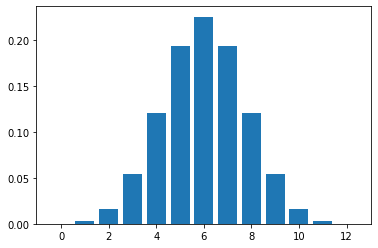

In [ ]:
# Gerar o gráfico:
plt.bar(k_valores,distbinom)
plt.show()

parametros:
x - 
n - numero da amostra
po - valor testado
alternative - se é bicaldal ou unilateral

In [ ]:
# Calculo da Estatística de teste
p = binom_test(x,n,Po,alternative='two-sided') # Caso seja unilateral a direita alternative='greater', caso contrário alternative = 'less'. 
print('p = %0.3f' %(p))
if p > alfa:
   print ("Conclusão: aceita-se Ho, ou seja, a proproção de desempenho do A é estatisticamente igual a 50% ao nível de 5% de significância")
else:
   print ("Conclusão: rejeita-se Ho, ou seja, a proproção de desempenho do A é estatisticamente diferente de 50% ao nível de 5% de significância")

p = 0.146
Conclusão: aceita-se Ho, ou seja, a proproção de desempenho do A é estatisticamente igual a 50% ao nível de 5% de significância


*normal*

na prática é o que vamos utilizar

In [ ]:
## Resolução de Teste para proporção por meio da Distribuição Normal
# Para testar se existe	diferença	entre	dois sistemas computacionais (A e B), observou-se o desempenho com 12 cargas de trabalho. Em 3 casos o sistema A apresentou  melhor desempenho do que o B. Nos demais, o sistema B foi  melhor.  Qual a conclusão ao nível de significância de  5%?
# Ho: Po = 0,5 vs H1: Po <> 0,5
z, p = proportions_ztest(x, n, Po,alternative='two-sided',prop_var=0.5)
# Conclusão:
print('z= %0.3f, p= %0.3f' % (z, p))
if p > alfa:
   print ("Conclusão: aceita-se Ho, ou seja, a proproção é igual a 50% ao nível de 5% de significância")
else:
   print ("Conclusão: rejeita-se Ho, ou seja, a proproção é diferente de 50% ao nível de 5% de significância")

z= -1.732, p= 0.083
Conclusão: aceita-se Ho, ou seja, a proproção é igual a 50% ao nível de 5% de significância


t só serve se fosse comparar com a tabela, mas não a necessidade, só preciso do p par ter a conclusao

In [ ]:
### Exemplo: O tempo para transmitir 10 MB em determinada rede de computadores varia segundo m modelo normal, com média 7,4 s e variância 1,3 s. Depois de algumas mudanças na rede, acredita-se numa redução no tempo de transmissão de dados, além de uma possível alteração na variabilidade. 
### Foram realizados 10 ensaios independentes com um arquivo de 10 MB e foram anotados os tempos de transmissão, em segundos: 
### {6,8; 7,1; 5,9; 7,5; 6,3; 6,9; 7,2; 7,6; 6,6; 6,3}. Existe evidência suficiente de que o tempo médio de transmissão foi reduzido ao nível de 5% de significância? 
# Ho: Mo = 7,4 vs H1: Mo < 7,4
x = (6.8,7.1,5.9,7.5,6.3,6.9,7.2,7.6,6.6,6.3) #amostra
Mo = 7.4 #media
alfa=0.05 
media = np.mean(x)
print("Média =",media)
dp = np.std(x)
print("Desvio-padrão =",dp)
t, po = ttest_1samp(x, Mo)  #parametros: dados e media
# Para realizar um teste unilateral multiplica-se o "p" por dois
p=2*po    
# Conclusão:
print('t= %0.3f, p= %0.3f' % (t, p))
if p > alfa:
   print ("Conclusão: aceita-se Ho, ou seja, a média é estatisticamente igual a 7.4 s ao nível de 5% de significância")
else:
   print ("Conclusão: Rejeita-se Ho, ou seja, a média é estatisticamente menor de 7.4 s ao nível de 5% de significância")

Média = 6.82
Desvio-padrão = 0.5230678732248808
t= -3.327, p= 0.018
Conclusão: Rejeita-se Ho, ou seja, a média é estatisticamente menor de 7.4 s ao nível de 5% de significância


RESPOSTA: realmente fiz uma experimentação, fiz z media e baixou para 6,8, e a chance de eu estar certo é de 95% ,... 99,98% -> 1 - p

o tempo reduziu ao nível de 95% de confiança

1- alpha é a confiança

q-quadrado

matriz

In [ ]:
### Exemplo de testes de hipóteses para tabelas LxC
# Criação da matriz com os dados do exemplo de probabilidade
tabela = np.array([[500,4500,1500], [30,270,50]])
tabela

array([[ 500, 4500, 1500],
       [  30,  270,   50]])

analise se a diferença entre o valor esperado é grade
se houver rejeição -> indica que há dependencia entre as variaveis

isso é proporção , é binomial, mas o n é grande, então pegar uma distribução continua de -> como o q-quadrado

o q-quadrado é uma muito utilizado para avaliar variaveis quantitativas -> se há relação e correlação entre as variaveis / muito comum grafico de dispersão

ela é assimetrica

chi2_contigencia é para tabela, matriz

essa função já calcula o valor esperado

quanto maior q , mais chance de o  p estar dentro do 0,05

caso zere a tabela, agrupa os dados

só precisamos de 3 casas depois da virgula no p

In [ ]:
qui, p, gl, esperado = chi2_contingency(tabela,correction=False)   ##estou dizendo que não é correlação, pq tenho 2 variaveis qualitativas
print("Valores esperados")
print(esperado)
print('qui=%.3f, p=%.3f' % (qui, p))
if p > 0.05:
	print('Conclusão: as variáveis são independentes ao nível de 5% de signficância')
else:
	print('Conclusão: as variáveis são dependentes ao nível de 5% de significância')


Valores esperados
[[ 502.91970803 4526.27737226 1470.80291971]
 [  27.08029197  243.72262774   79.19708029]]
qui=14.661, p=0.001
Conclusão: as variáveis são dependentes ao nível de 5% de significância


In [ ]:
bdenade = pd.read_csv('bdenade.csv',sep=';',decimal=',')
bdenade.columns = ["ano","area","ies","esfera","ninscritos","nparticipantes","notafg","notace","conceito","nota"]
bdenade

,ano,area,ies,esfera,ninscritos,nparticipantes,notafg,notace,conceito,nota
0,2017,21,4,Federal,64,50,60.36,54.71,3.35,4.0
1,2017,21,452,Privada,5,5,46.60,35.38,1.04,2.0
2,2017,21,669,Privada,70,64,45.57,35.05,0.97,2.0
3,2017,21,1422,Privada,250,130,47.18,37.23,1.23,2.0
4,2017,21,2147,Privada,250,190,40.09,33.75,0.64,1.0
...,...,...,...,...,...,...,...,...,...,...
610,2018,85,1422,Privada,8,6,45.90,43.95,2.66,3.0
611,2018,87,1422,Privada,21,21,32.03,46.08,2.73,3.0
612,2018,86,669,Privada,31,31,36.45,42.13,2.05,3.0
613,2018,38,322,Privada,16,8,37.98,37.98,1.64,2.0


criando variavel categforico

In [ ]:
bdenade['nota2'] = 0
bdenade.loc[(bdenade['nota'] <  4 ), 'nota2'] = "0 a 3"
bdenade.loc[(bdenade['nota'] >=  4 ), 'nota2'] = "4 a 5"

sera que a nota nas faculdades foi a

In [ ]:
# Tabela de contigência no pandas
tab_contigencia = pd.crosstab (bdenade.esfera,bdenade.nota2) 
tab_contigencia

nota2,0 a 3,4 a 5
esfera,,
Estadual,50,23
Federal,84,46
Privada,389,23


aplicando o q-quadrado

mostrou que a privada é melhor que as demais


o p deu menor que 0,05, 
são dependentes, existe sim uma relação entre, observei que os alunos tiveram  desempenho , que há dependencia da esfera e a nota, ou seja a esfera influencia no resultado

In [ ]:
qui, p, gl, esperado = chi2_contingency(tab_contigencia,correction=False)
print("Valores esperados")
print(esperado)
print('qui=%.3f, p=%.3f' % (qui, p))
if p > 0.05:
	print('Conclusão: as variáveis são independentes')
else:
	print('Conclusão: as variáveis são dependentes')


Valores esperados
[[ 62.0796748   10.9203252 ]
 [110.55284553  19.44715447]
 [350.36747967  61.63252033]]
qui=86.820, p=0.000
Conclusão: as variáveis são dependentes


In [ ]:
bd_federal = bdenade.loc[bdenade.esfera == "Federal"]
bd_privada = bdenade.loc[bdenade.esfera == "Privada"]
print("Federal:",bd_federal.shape)
print("Privada:",bd_privada.shape)

Federal: (130, 11)
Privada: (412, 11)


para duas amostras -> função ttest_ind()as duas bases de dados

Comparar a média de um campo numérico em relação a um campo categórico e responder se existe diferença estatística ao nível de 5% de significância;

In [ ]:
alfa=0.05
média = np.mean(bd_federal.nota)
dp = np.std(bd_federal.nota)
print("Média federal =",round(média,2))
print("Desvio-padrão federal =",round(dp,2))
média = np.mean(bd_privada.nota)
dp = np.std(bd_privada.nota)
print("Média privada =",round(média,2))
print("Desvio-padrão privada =",round(dp,2))
t,p = ttest_ind(bd_federal.nota,bd_privada.nota)
print('t= %0.3f, p= %0.3f' % (t, p))
if p > alfa:
   print ("Conclusão: aceita-se Ho, ou seja, as médias são estatisticamente iguais ao nível de significância de 5%")
else:
   print ("Conclusão: rejeita-se Ho, ou seja, as médias são estatisticamente diferentes ao nível de significância de 5%")

Média federal = 3.07
Desvio-padrão federal = 1.0
Média privada = 2.21
Desvio-padrão privada = 0.77
t= 10.282, p= 0.000
Conclusão: rejeita-se Ho, ou seja, as médias são estatisticamente diferentes ao nível de significância de 5%
